# Imports

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importing Data

In [ ]:
path = os.path.join(os.getcwd(), "gdrive", "MyDrive","ORIE 5741 Final Project", "Data")
data = pd.read_csv(os.path.join(path, "processed_hotel_bookings.csv"), index_col=0)
data

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
8030,1,238,2016,9,37,7,0,3,1,0.0,...,0,0,0,0,1,0,0,0,1,0
37532,0,33,2017,6,25,19,1,1,2,0.0,...,0,0,0,1,0,0,0,0,1,0
76865,1,239,2015,10,42,17,0,1,2,0.0,...,0,0,0,0,1,0,0,0,1,0
1960,0,64,2015,9,39,24,0,3,2,0.0,...,0,0,0,1,0,0,0,0,1,0
98971,0,34,2016,10,41,2,2,3,2,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101117,0,44,2016,11,45,1,0,5,2,0.0,...,0,0,0,1,0,0,0,0,1,0
84909,0,39,2016,3,10,4,0,2,1,0.0,...,0,0,0,1,0,0,0,0,0,1
99765,0,10,2016,10,42,13,1,3,3,0.0,...,0,0,0,1,0,0,0,0,1,0
62196,1,33,2017,1,1,4,0,4,1,0.0,...,0,0,0,1,0,0,0,0,1,0


# Preprocessing

In [ ]:
# separating data into features (X) and outcomes (y)
X = data.loc[:, data.columns != 'is_canceled']
y = data['is_canceled']

# splitting data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# standardizing numeric columns and one-hot encoding categorical variables since algorithms are sensitive to scale
numerical_cols = ['lead_time', 'stays_in_weekend_nights',
                'stays_in_week_nights', 'adults', 'children', 'babies',
                'previous_cancellations', 'previous_bookings_not_canceled', 
                'booking_changes', 'days_in_waiting_list', 'adr',
                'required_car_parking_spaces', 'total_of_special_requests']
for n in numerical_cols:
    scalar = StandardScaler()
    scalar.fit(np.array(X_train[n]).reshape(-1, 1))
    X_train[n] = scalar.transform(np.array(X_train[n]).reshape(-1, 1)).reshape(-1, 1)
    X_test[n] = scalar.transform(np.array(X_test[n]).reshape(-1, 1)).reshape(-1, 1)

In [ ]:
# final training data
X_train

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
53763,0.300734,2016,6,27,29,-0.934825,0.263137,0.216857,-0.264156,-0.071431,...,0,0,0,1,0,0,0,0,1,0
21865,-0.847880,2016,3,11,6,1.086661,1.329396,0.216857,-0.264156,-0.071431,...,0,0,0,1,0,0,0,0,1,0
35812,-0.035445,2017,4,17,29,1.086661,-0.803122,0.216857,-0.264156,-0.071431,...,0,0,0,1,0,0,0,0,0,1
37270,-0.577069,2017,6,23,5,1.086661,1.329396,0.216857,-0.264156,-0.071431,...,0,0,0,1,0,0,0,0,1,0
46448,-0.866557,2016,1,1,2,1.086661,-0.803122,0.216857,-0.264156,-0.071431,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13708,-0.502362,2017,8,35,27,1.086661,-1.336251,0.216857,-0.264156,-0.071431,...,0,0,0,1,0,0,0,0,1,0
16383,-0.549054,2015,8,34,21,1.086661,1.329396,0.216857,-0.264156,-0.071431,...,0,0,0,1,0,0,0,0,0,1
42448,-0.399640,2015,9,36,5,1.086661,-0.269992,0.216857,-0.264156,-0.071431,...,0,0,0,1,0,0,0,0,0,1
86088,-0.903910,2016,3,13,24,-0.934825,0.263137,0.216857,2.209720,-0.071431,...,0,0,0,1,0,0,0,0,1,0


# Training

## Tuning Parameters

In [ ]:
C_vals = [0.01, 0.1, 1, 10]
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
random_grid = {'C': C_vals,
               'solver': solvers}

In [ ]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100000)
lr_random.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=100000. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=100000,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']})

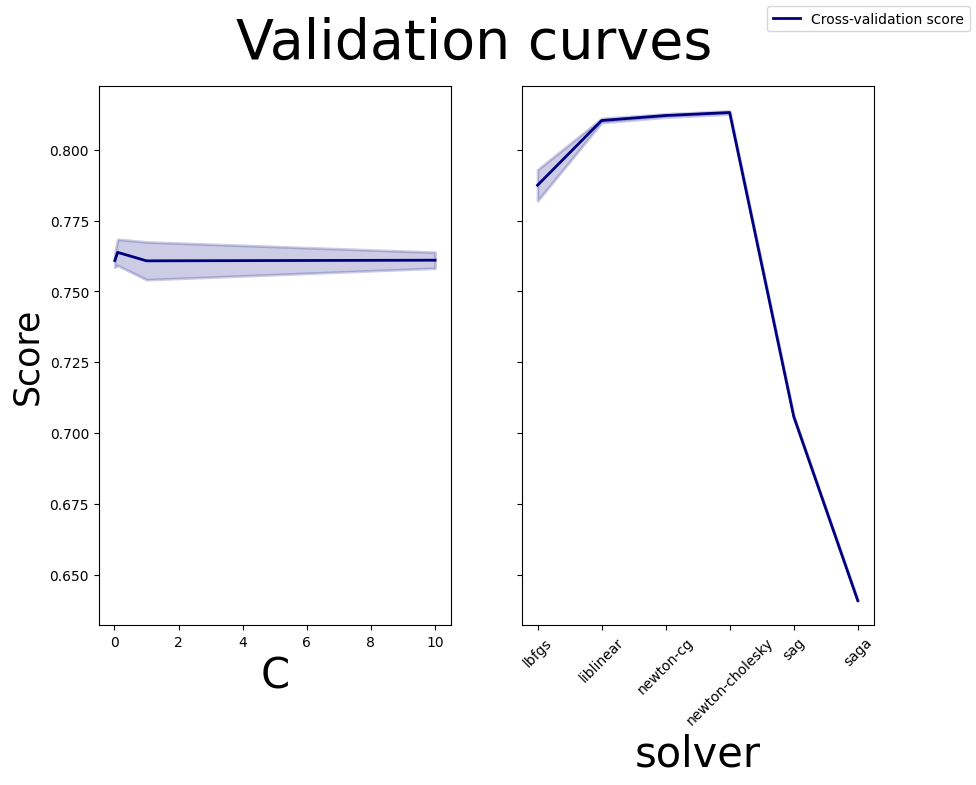

In [ ]:
# graphing parameters and associated validation error
df = pd.DataFrame(lr_random.cv_results_)
results = ['mean_test_score',
           'std_test_score']


fig, axes = plt.subplots(1, len(random_grid), 
                         figsize = (5*len(random_grid), 7),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=25)


for idx, (param_name, param_range) in enumerate(random_grid.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_test_score': 'mean',
              'std_test_score': 'std'})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=30)
    # axes[idx].set_ylim(0.4, 0.45)
    lw = 2
    # axes[idx].plot(param_range, grouped_df['mean_train_score'], label="Training score",
    #             color="darkorange", lw=lw)
    # axes[idx].fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
    #                 grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
    #                 color="darkorange", lw=lw)
    axes[idx].plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                color="navy", lw=lw)
    axes[idx].fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                    color="navy", lw=lw)

handles, labels = axes[0].get_legend_handles_labels()
fig.suptitle('Validation curves', fontsize=40)
fig.legend(handles, labels, ncol=2, fontsize=10)

plt.xticks(rotation=45)

# fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()

In [ ]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.392602,0.032633,0.007575,0.000084,lbfgs,0.01,"{'solver': 'lbfgs', 'C': 0.01}",0.804446,0.800541,0.781250,0.792969,0.800481,0.795937,0.008231,13
1,0.213533,0.008543,0.005714,0.000222,liblinear,0.01,"{'solver': 'liblinear', 'C': 0.01}",0.813758,0.811956,0.798377,0.803786,0.809796,0.807535,0.005680,12
2,9.158716,2.152530,0.010649,0.006057,newton-cg,0.01,"{'solver': 'newton-cg', 'C': 0.01}",0.814359,0.814659,0.797776,0.804087,0.810998,0.808376,0.006525,10
3,0.361939,0.199239,0.007532,0.000066,newton-cholesky,0.01,"{'solver': 'newton-cholesky', 'C': 0.01}",0.814359,0.814659,0.797776,0.802885,0.811298,0.808195,0.006725,11
4,3.959332,0.033119,0.009254,0.002765,sag,0.01,"{'solver': 'sag', 'C': 0.01}",0.704115,0.707720,0.706731,0.703425,0.701923,0.704783,0.002140,20
5,4.268739,0.121147,0.008764,0.001570,saga,0.01,"{'solver': 'saga', 'C': 0.01}",0.644938,0.639231,0.637320,0.639423,0.642428,0.640668,0.002689,24
6,0.533018,0.136546,0.008747,0.002561,lbfgs,0.1,"{'solver': 'lbfgs', 'C': 0.1}",0.800240,0.803244,0.768029,0.794471,0.812800,0.795757,0.015081,14
7,0.252919,0.018734,0.006181,0.000526,liblinear,0.1,"{'solver': 'liblinear', 'C': 0.1}",0.819465,0.812857,0.801983,0.804087,0.815204,0.810719,0.006656,8
8,14.454359,0.372337,0.007625,0.000110,newton-cg,0.1,"{'solver': 'newton-cg', 'C': 0.1}",0.819766,0.816762,0.805589,0.810397,0.817909,0.814084,0.005289,4
9,0.354617,0.017916,0.008332,0.001184,newton-cholesky,0.1,"{'solver': 'newton-cholesky', 'C': 0.1}",0.820366,0.816762,0.805589,0.810397,0.818209,0.814265,0.005464,3


0.7616342027388008


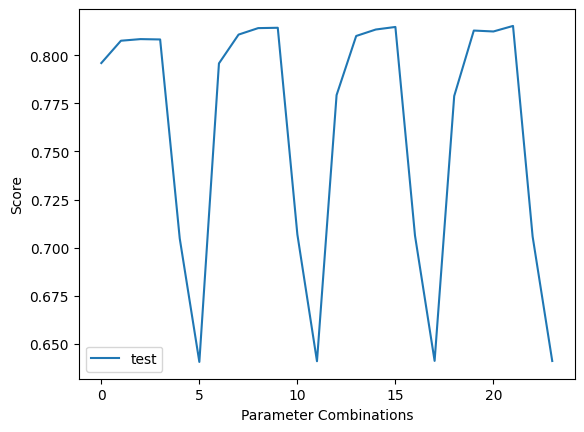

In [ ]:
import statistics 
test_scores = lr_random.cv_results_['mean_test_score']
# train_scores = lr_random.cv_results_['mean_train_score']
mean_test_score = statistics.mean(test_scores)
print(mean_test_score)

plt.plot(test_scores, label='test')
# plt.plot(train_scores, label='train')
plt.xlabel('Parameter Combinations')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [ ]:
# printing best params and validation score
print(lr_random.best_params_)
print(lr_random.best_score_)

{'solver': 'newton-cholesky', 'C': 10}
0.8152259355431293


# Model Testing

In [ ]:
# testing best rf model
# getting confusion matrix: rows are actual values, columns are predicted
y_pred_probs = lr_random.predict(X_test)
y_pred = np.round(y_pred_probs)
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1
0,4105,424
1,872,1732


In [ ]:
# not canceling is positive
# canceling is negative
accuracy = (cm[0][0] + cm [1][1]) / np.sum(cm)
precision = (cm[0][0]) / np.sum(cm[0, :])
recall = (cm[0][0]) / np.sum(cm[:, 0])
f1 = 2 * (precision * recall) / (precision + recall)
false_negative_rate = cm[1][0]/np.sum(cm[:, 0])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("False negative rate:", false_negative_rate)

Accuracy: 0.8183092667881676
Precision: 0.9063810995804813
Recall: 0.8247940526421539
F1: 0.863665053650326
False positive rate: 0.1752059473578461


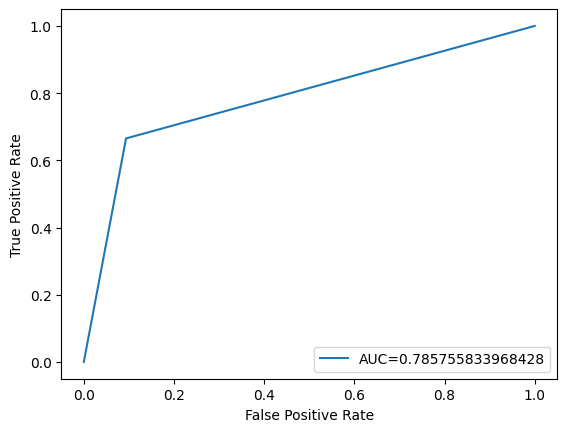

In [ ]:
# from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
fpr, tpr, _ = roc_curve(y_test,  y_pred_probs)
auc = roc_auc_score(y_test, y_pred_probs)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()